Input: 
- road segments (to be decided how big, probably multiple bridges per segments)
- Traffic density per type of transport (3, decided in Simio) per segment
- Broken bridges per segment
- Average travel time in segment per type of transport

Output:
- stacked graph of traffic density
- heatmap of traffic density --> perhaps better to take average travel time??
- broken bridges per segment (include type only in table, not graph)

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
from Visualisation import plot_traffic_density

%matplotlib inline


NameError: global name 'road_segments' is not defined

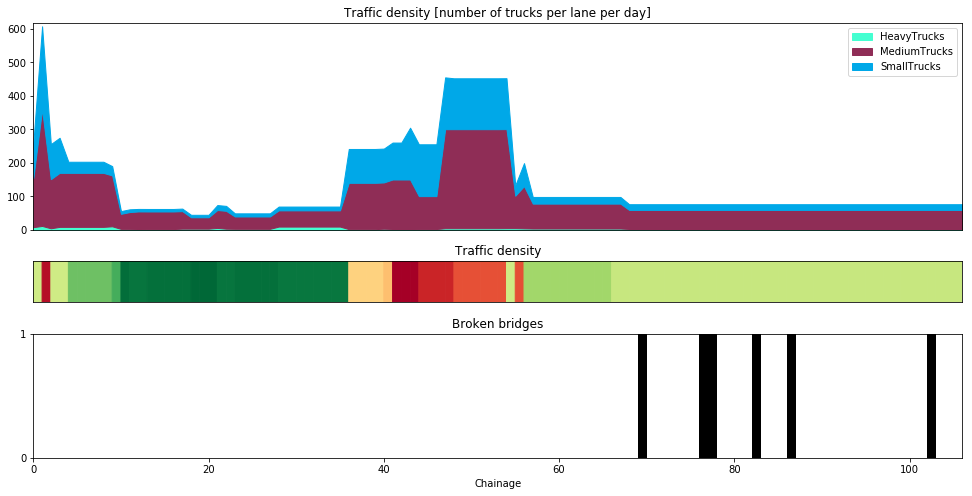

In [4]:
# Depending on the choices made by the user, select the right csv file and data
roadId = 'N1'

data = pd.read_csv('vulnerabilitypersegment'+str(roadId)+'.csv') # prob. different file
broken_bridges = data['NumberOfDBridges'].tolist()  #needs to be replaced with real data of the broken bridges!!!
traffic = pd.read_csv('trafficpersegment'+str(roadId)+'.csv')
    
HeavyTrucks = traffic['heavyTruck'].tolist() # this and below needs to be replaced with different types!!!
MediumTrucks = traffic['mediumTruck'].tolist()
SmallTrucks = traffic['smallTruck'].tolist()

traffic_density = traffic['total'].tolist()
chainage = traffic['chainage'].tolist()

road_segments = []
for segment in chainage:
    round_segment = round(segment,1)
    road_segments.append(round_segment)

# Based on user choices, define what visualisations to make    

plot_traffic_density(road_segments,HeavyTrucks,MediumTrucks,SmallTrucks,traffic_density,broken_bridges)      